## Contexto

Una entidad bancaria acaba de realizar una campaña de marketing, cuyo objetivo buscaba lograr que los clientes contactados depositaran sus ahorros a plazo fijo. Los resultados fueron peor de lo esperado.
Esta campaña se enfocó en un 10% de la cartera total de clientes del banco.

El banco contrata nuestros servicios como científic@ de datos y nos comunica los siguintes objetivos:

* Repetir una o más campañas en el transcurso de los siguientes 18 meses. 
* Maximizar la tasa de conversión de las mismas y entender los factores que influyen en esta tasa.

El banco nos provee la lista de los ~4.5K clientes ("clientes.csv")
https://drive.google.com/file/d/1y3sPhGrLUW5DPunat__2xp2NAWJVDWIL/view?usp=sharing
que fueron contactados durante esta última campaña y nos informa que por el momento NO nos proveerá de mas datos que estos.


Nuestra tarea consiste en ayudar al banco a cumplir sus objetivos.

### Metadata

#### Datos clientes
1. age: edad del clietne
2. job: tipo de trabajo
3. marital: estado civil
4. education: nivel de educación
5. default: indica si el cliente registra algún default crediticio
5. balance: saldo en dólares de la caja de ahorro del cliente
6. housing: indica si el cliente posee un préstamo hipotecario
7. loan: indica si el cliente posee algún préstamo personal

#### Datos del último contacto de la campaña actual
9. contact: canal de contacto
10. day: día de último contacto
11. month: mes de último contacto
12. duration: duracion del último contacto
13. campaign: cantidad de contactos durante la campaña

#### Datos campaña previa
14. pdays: días transcurridos desde el último contacto por una campaña previa
15. previous: cantidad de contactos previous a esta campaña
16. poutcome: resultado de la campaña previa

#### Resultado campaña actual
17. y - Indica si el cliente realizó depósito a plazo fijo(binaria: 'yes','no')

In [ ]:
!pip install sklearn

In [11]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df= pd.read_csv("clientes.csv",delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


C:\Users\Nicolas\AppData\Local\Temp\ipykernel_12020\3356140385.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(df.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12});


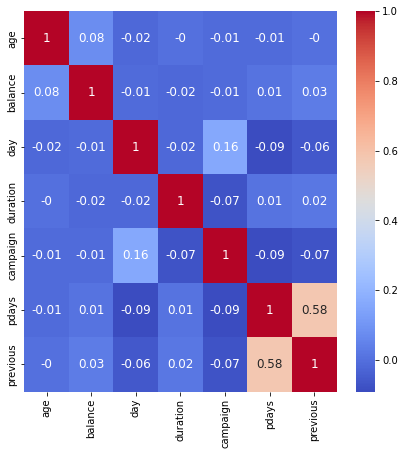

In [12]:
plt.figure(figsize = (7,7))
sns.heatmap(round(df.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12});